In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


sns.set()

In [2]:
data = pd.read_csv('Insurance_cleaned.csv')

data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

data.head()

,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
0,2013,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,290,1,1960,4,1053,0
1,2015,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,490,1,1850,4,1053,0
2,2014,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,595,1,1960,4,1053,0
3,2013,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,2840,1,1960,4,1053,0
4,2014,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,680,1,1800,3,1053,0


In [3]:
data.tail()

,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
10190,2012,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,4,1900,4,6088,0
10191,2015,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,4,1900,4,6088,0
10192,2012,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,2,1948,4,6088,0
10193,2012,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,2,1993,4,6088,0
10194,2013,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,1819,1,1800,4,6088,0


# Univariate Analysis

In [4]:
data['Year of Observation'].value_counts()

2012    2707
2013    2578
2014    1927
2015    1550
2016    1433
Name: Year of Observation, dtype: int64

<AxesSubplot:title={'center':'Univariate Analysis Showing The Counts Of Insurance Made From 2013 - 2016'}, xlabel='Year of Observations', ylabel='Insurance Counts'>

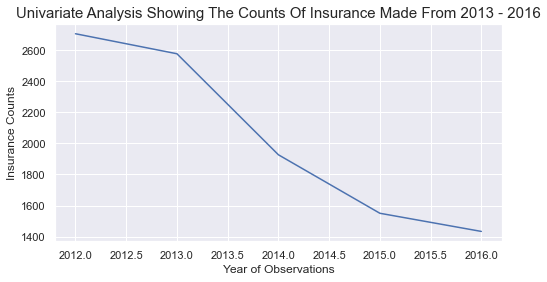

In [5]:
Year_of_observation = data['Year of Observation'].value_counts()

sns.set_theme(font_scale=1.0)
plt.figure(figsize=(8,4))
plt.title('Univariate Analysis Showing The Counts Of Insurance Made From 2013 - 2016', fontsize=15)
plt.xlabel('Year of Observations')
plt.ylabel("Insurance Counts")
sns.lineplot(x=Year_of_observation.index, y=Year_of_observation.values)

#plt.savefig('figures\CountsOfInsuranceMade')

Text(0.5, 1.0, 'The Percentage of Insured Properties Painted and Not-Painted')

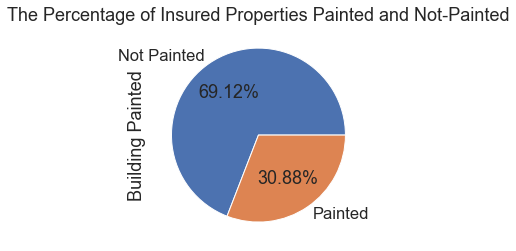

In [6]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,4))

data['Building Painted'].value_counts().plot(kind= "pie", autopct="%1.2f%%")
plt.title('The Percentage of Insured Properties Painted and Not-Painted',fontsize=18)


Text(0.5, 1.0, 'The Percentage Of Insured Properties With Gardens and without Gardens')

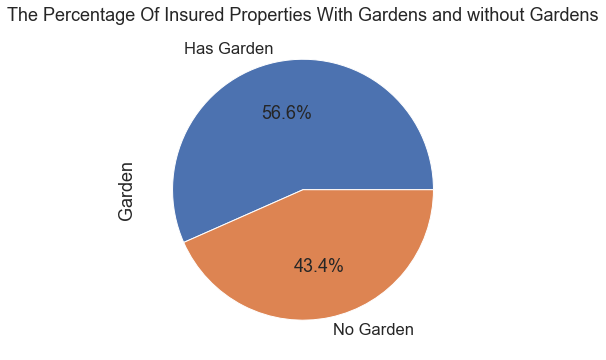

In [7]:
# univariate 'Garden' plot 
plt.figure(figsize=(9,6))
sns.set_theme(font_scale=1.5)
data['Garden'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("The Percentage Of Insured Properties With Gardens and without Gardens")


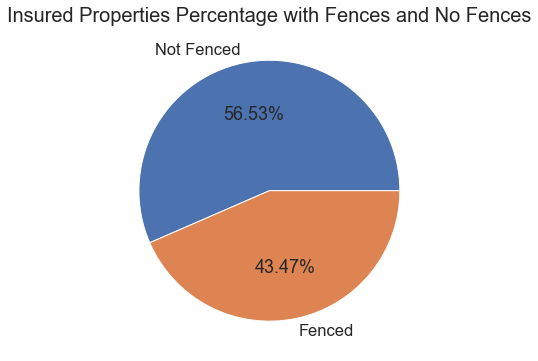

In [8]:
# plot a pie chart of insured properties with fence and without fence
Building_fenced = data['Building Fenced'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Building_fenced.values, labels=Building_fenced.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage with Fences and No Fences',fontsize = 20)

plt.show()

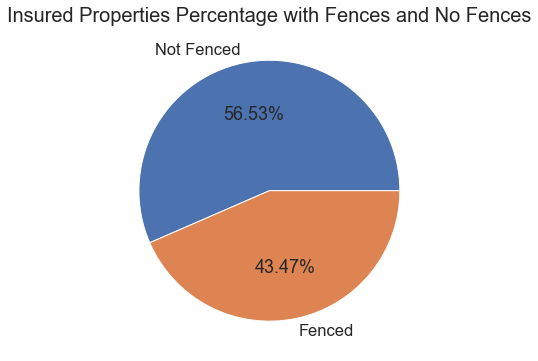

In [9]:
# plot a pie chart of insured properties with fence and without fence
Building_fenced = data['Building Fenced'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Building_fenced.values, labels=Building_fenced.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage with Fences and No Fences',fontsize = 20)

plt.show()

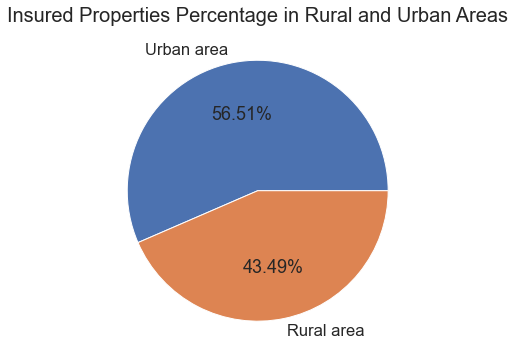

In [10]:
# plot a pie chart of insured properties with fence and without fence
Settlement = data['Settlement'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Settlement.values, labels=Settlement.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage in Rural and Urban Areas',fontsize = 20)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Building Dimension'>

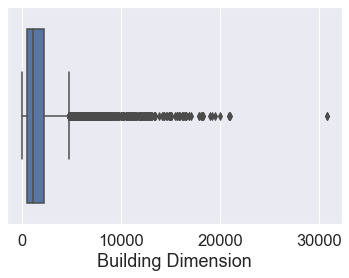

In [11]:
sns.boxplot(data['Building Dimension'])

In [18]:
dimension_mean = data['Building Dimension'].mean()
dimension_std = data['Building Dimension'].std()


(data['Building Dimension']-dimension_mean) / dimension_std

0       -0.676492
1       -0.588042
2       -0.541606
3        0.451247
4       -0.504014
           ...   
10190   -0.000291
10191   -0.000291
10192   -0.000291
10193   -0.000291
10194   -0.000291
Name: Building Dimension, Length: 10195, dtype: float64

In [12]:
# plot insured period of residential and non residential properties 

Groupby = pd.DataFrame(data.groupby('Insurance Period')['Residential'].value_counts(),
                      
                      )
Groupby.rename(columns={'Residential':'Counts'},inplace=True)
Groupby.reset_index(inplace=True)

residential = Groupby[Groupby['Residential'] == 1]
non_residential = Groupby[Groupby['Residential'] == 0]


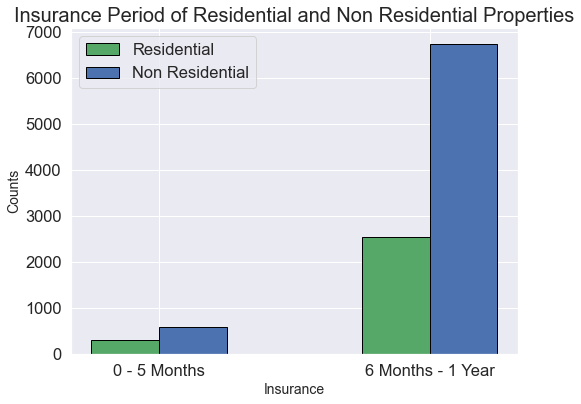

In [13]:
n = len(residential['Counts'])
r = np.arange(n)
width = 0.25

plt.figure(figsize=(8,6))
sns.set_theme(font_scale=1.5)
plt.bar(r,residential['Counts'], color='g',
       width = width, edgecolor = 'black',label='Residential')
plt.bar(r + width,non_residential['Counts'], color='b',
       width = width, edgecolor = 'black',label='Non Residential')

plt.xlabel('Insurance',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Insurance Period of Residential and Non Residential Properties',fontsize = 20)

plt.xticks(r + width/2,['0 - 5 Months','6 Months - 1 Year'])
plt.legend()

plt.show()

<AxesSubplot:>

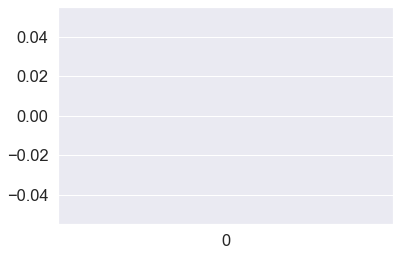

In [14]:
sns.barplot()

In [15]:
# Scatter plot of the building dimensions of insrance properties in years of observation 
# Also between rural and urban areas 


plt.figure(figsize=(10,6))
sns.swarmplot(data=df,  x='Settlement', y= 'Building Dimension')

NameError: name 'df' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.histplot(df['Date_of_Occupancy'])